# Regresión logística y MLP

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
plt.rcParams['figure.figsize'] = [10, 8]

## Razón de Momios



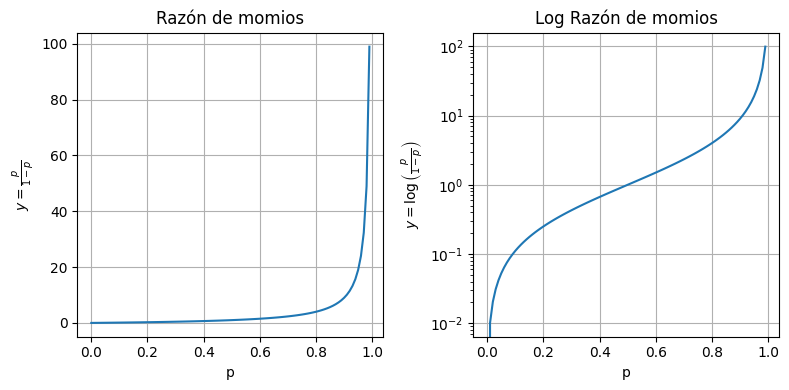

In [7]:
p= np.arange(0,1,1/100)

y = p/(1-p)

fig, (ax1, ax2) =plt.subplots(1,2, figsize=(8,4))
ax1.plot(p,y)
ax1.set_xlabel('p')
ax1.set_ylabel(r'$y =\frac{p}{1-p}$')
ax1.set_title('Razón de momios')
ax1.grid(True)

ax2.semilogy(p,y)
ax2.set_xlabel('p')
ax2.set_ylabel(r'$y = \log\left(\frac{p}{1-p}\right)$')
ax2.set_title('Log Razón de momios')
ax2.grid(True)

plt.tight_layout()
plt.show()


## Regresión Logística 

Dataset: [bmd.csv](https://www.dropbox.com/s/7wjsfdaf0wt2kg2/bmd.csv?dl=1)

Es un dataset con varos atributos sobre densitometría de huesos y cuya variable de respuesta es si hay o no fractura

| atributo     | explicación | 
|--------------|-------------|
|id            | id de registro (int) |
|age           | edad (float) |
|sex           | F o M categórica (str)|
| **fracture** | fracture \| no fracture categórica (str) |
| weight_kg    | peso (float) |
| heigh_cm     | altura (float) |
|medication    | categórica (str) |
|waiting_time  | tiempo de espera (int) |
|  bmd         | [0-1] (float) |


In [8]:
df_bmd = pd.read_csv('bmd.csv')
df_bmd


,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


Vamos a construir la variable de _índice de masa corporal (bmi)_

$$
bmi = \frac{peso} {altura^2}
$$

Aparte también generamos las variables dummies asociadas a la variable de respuesta con `pd.get_dummies(df, columns)`

In [9]:
# construimos las variables auxiliares como 
# bmi
# fractura
# sexo
#
df_bmd['bmi'] = df_bmd.apply(lambda x: x['weight_kg'] / (x['height_cm']/100)**2, axis=1)
# df_bmd = pd.get_dummies(df_bmd, columns=['fracture'], dtype=int)
df_bmd['fractura'] = df_bmd['fracture'].map(lambda x: 1 if x=='fracture' else 0)
df_bmd['sexo']     = df_bmd['sex'].map(lambda x: 1 if x=='F' else 0)
df_bmd

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd,bmi,fractura,sexo
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793,26.467882,0,1
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946,29.721079,0,1
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067,25.111583,0,0
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112,27.392257,0,1
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909,21.218317,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941,27.513385,1,0
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971,22.761468,1,1
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037,23.458562,1,0
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072,25.402816,1,0


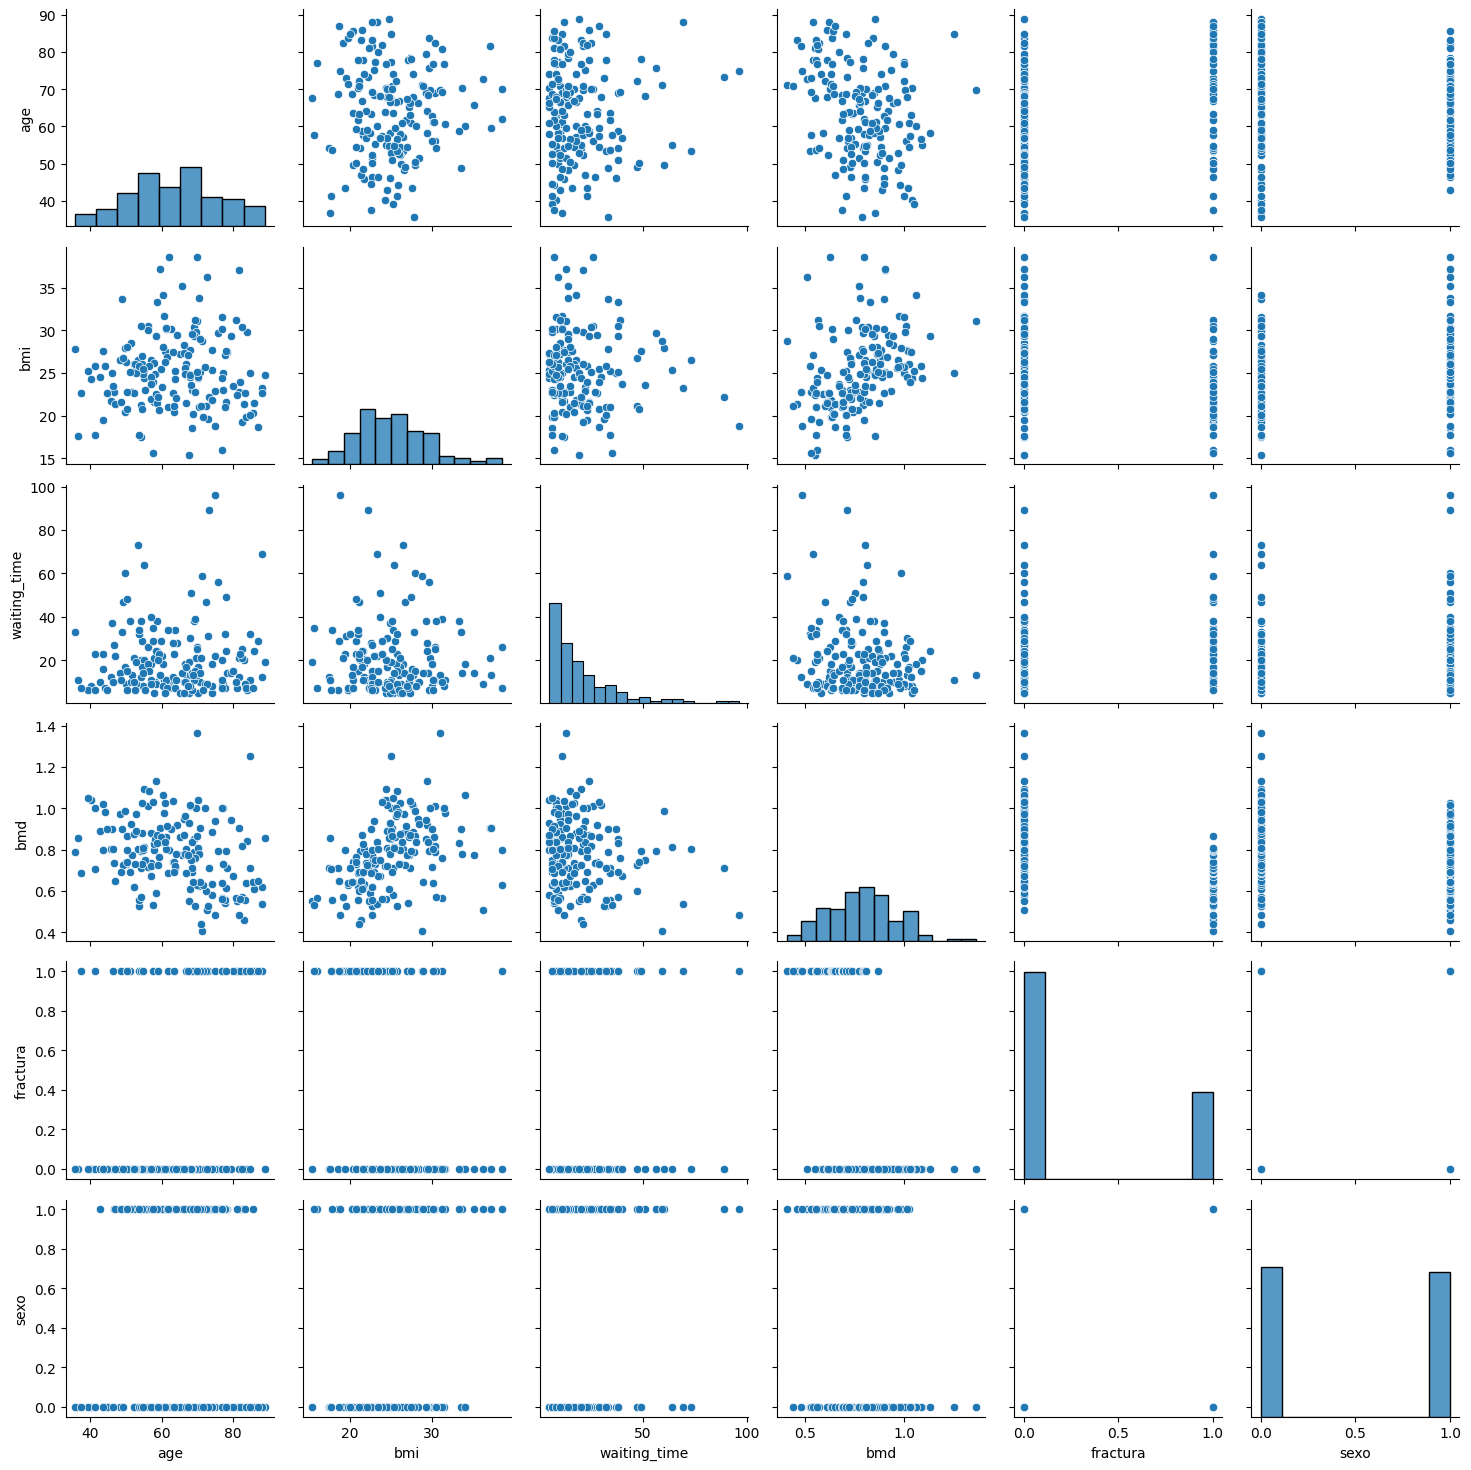

In [10]:
cols = ['age','bmi', 'waiting_time', 'bmd', 'fractura', 'sexo']
g = sns.PairGrid(df_bmd[cols])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Regresión logística

In [11]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model     import LogisticRegression
from sklearn.metrics          import classification_report, accuracy_score
from sklearn.preprocessing    import StandardScaler

In [12]:
# instanciamos el clasificador
clf = LogisticRegression(solver='liblinear')

In [13]:
# tomamos nuestros datos y los dividimos en conjunto de entrenamiento y prueba
X = df_bmd[['age', 'sexo', 'weight_kg', 'height_cm', 'bmd', 'bmi']]
y = df_bmd['fractura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
# entrenamos
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [15]:
# evaluamos nuestro modelo
#
# Obtenemos las predicciones
y_pred = clf.predict(X_test)

# Evaluación
print(f"Accuray {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuray 0.7941176470588235
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       0.60      0.38      0.46         8

    accuracy                           0.79        34
   macro avg       0.71      0.65      0.67        34
weighted avg       0.77      0.79      0.78        34



Ya que clasificamos lo que  necesitamos ahora es entender cómo impactan los diferentes coeficientes. Para esto vamos a recupear los coeficientes con el atributo `clf.coef_[0]` pero necesitamos también el nombre de las variables usadas con `clf.feature_names_in`

In [16]:
atributos = clf.feature_names_in_
coefs     = clf.coef_[0]

# Unir en DataFrame para interpretación
import pandas as pd
coef_df = pd.DataFrame({
    'Variable': atributos,
    'Coeficiente': coefs,
    'Odds Ratio': np.exp(coefs)*100
})

# Ordenar por impacto
coef_df.sort_values(by='Coeficiente', ascending=False, inplace=True)
print(coef_df)

    Variable  Coeficiente  Odds Ratio
0        age     0.061308  106.322610
3  height_cm     0.016353  101.648720
5        bmi    -0.060214   94.156275
2  weight_kg    -0.060441   94.134925
1       sexo    -0.548081   57.805799
4        bmd    -2.572027    7.638060


C:\Users\usuario\AppData\Local\Temp\ipykernel_1028\2319892536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coeficiente', y='Variable', palette='coolwarm')


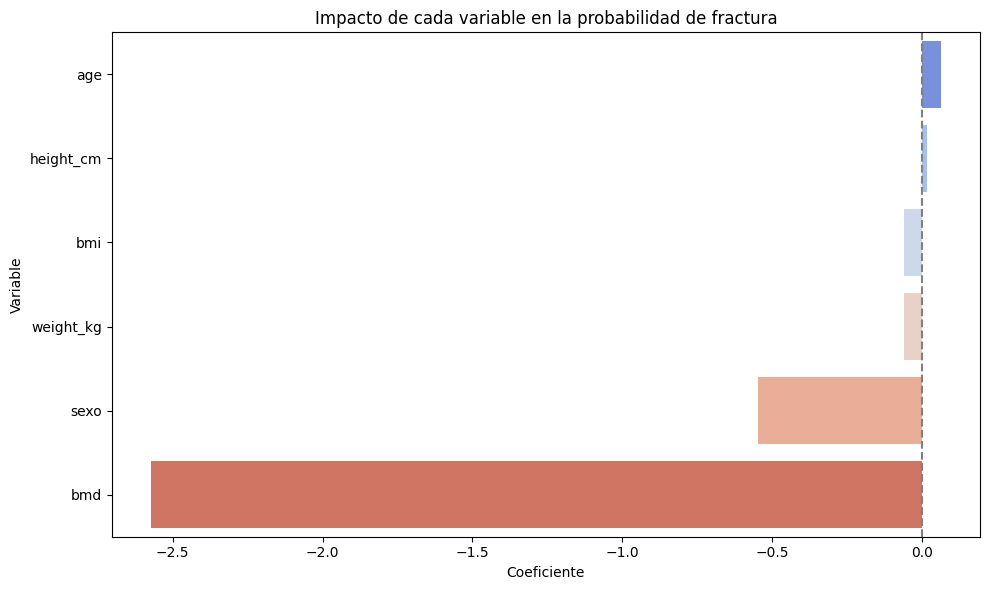

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coeficiente', y='Variable', palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Impacto de cada variable en la probabilidad de fractura')
plt.tight_layout()
plt.show()

## Perceptrón Multicapa

In [18]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [19]:
# entrenamos el perceptrón
clf_mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42,
              solver='lbfgs')

In [20]:

# Predicciones
y_pred = clf_mlp.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       0.75      0.38      0.50         8

    accuracy                           0.82        34
   macro avg       0.79      0.67      0.70        34
weighted avg       0.81      0.82      0.80        34



In [21]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    RocCurveDisplay
)


In [28]:
def evaluar_modelo_con_graficos(clasif, X_test, y_test, model_name):
    y_pred = clasif.predict(X_test)

    # --- Matriz de confusión ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de confusión - {model_name}")
    plt.show()

    # --- Curva ROC (si el modelo tiene predict_proba o decision_function) ---
    if hasattr(clasif, 'predict_proba'):
        y_scores = clasif.predict_proba(X_test)[:, 1]
    elif hasattr(clasif, 'decision_function'):
        y_scores = clasif.decision_function(X_test)
    else:
        print(f"!! El modelo {model_name} no soporta ROC (no tiene probabilidades)")
        return

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
    plt.title(f"Curva ROC - {model_name}")
    plt.show()



📊 Evaluación visual: Logística


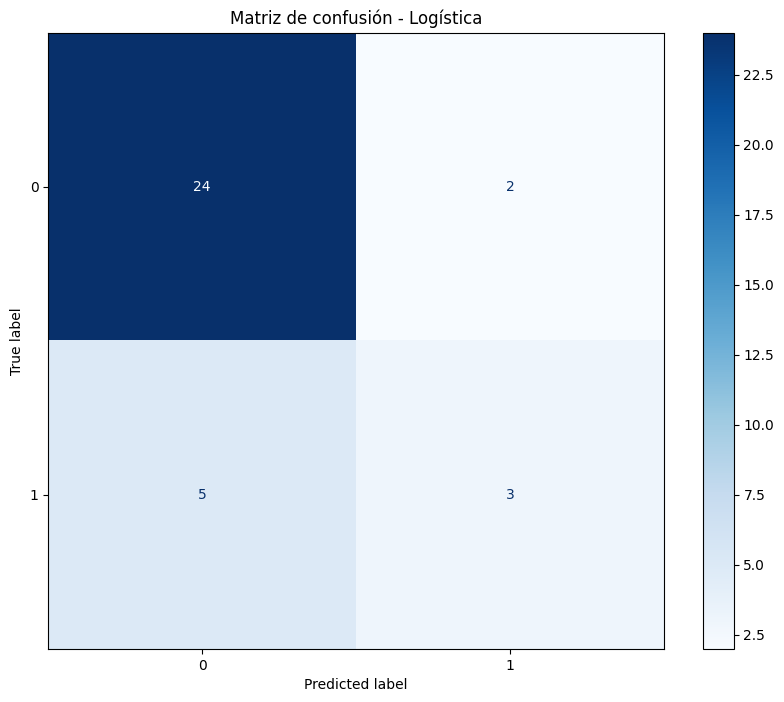

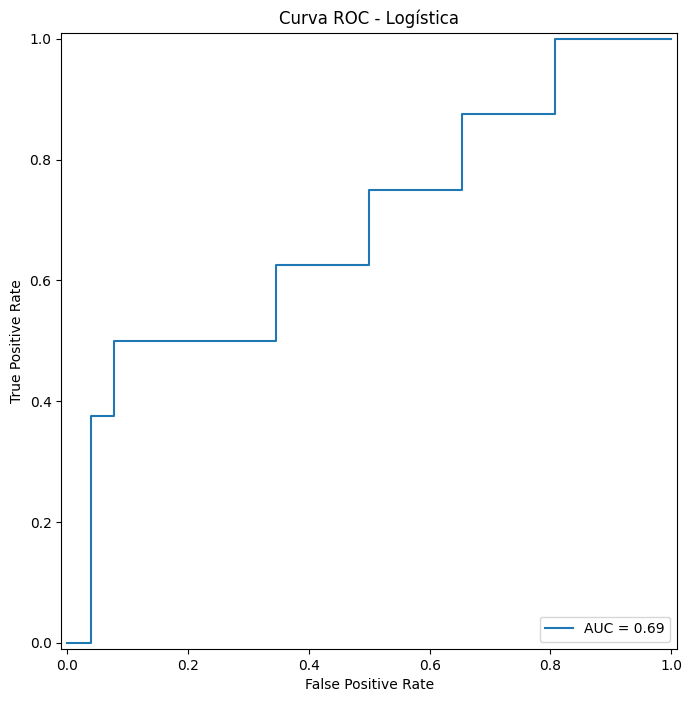


📊 Evaluación visual: MLP


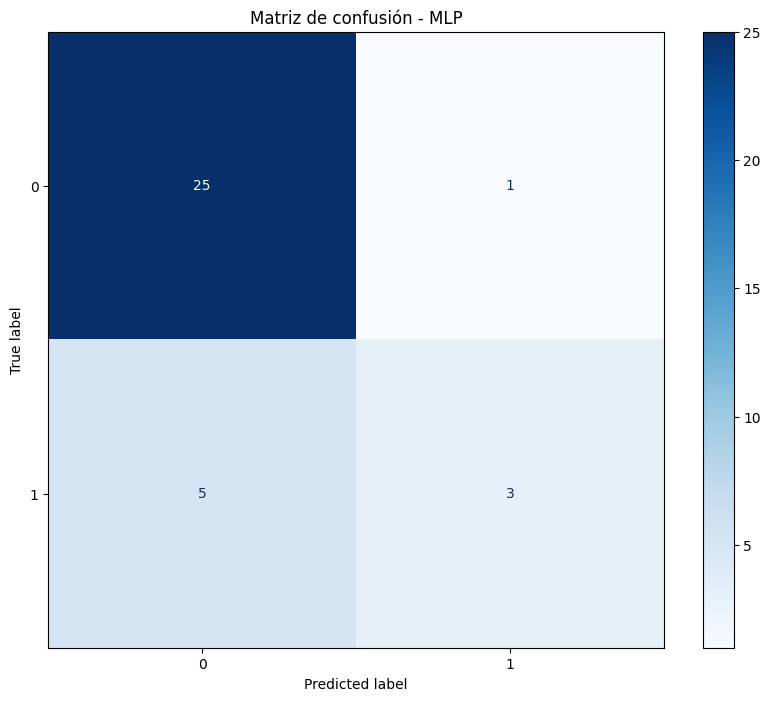

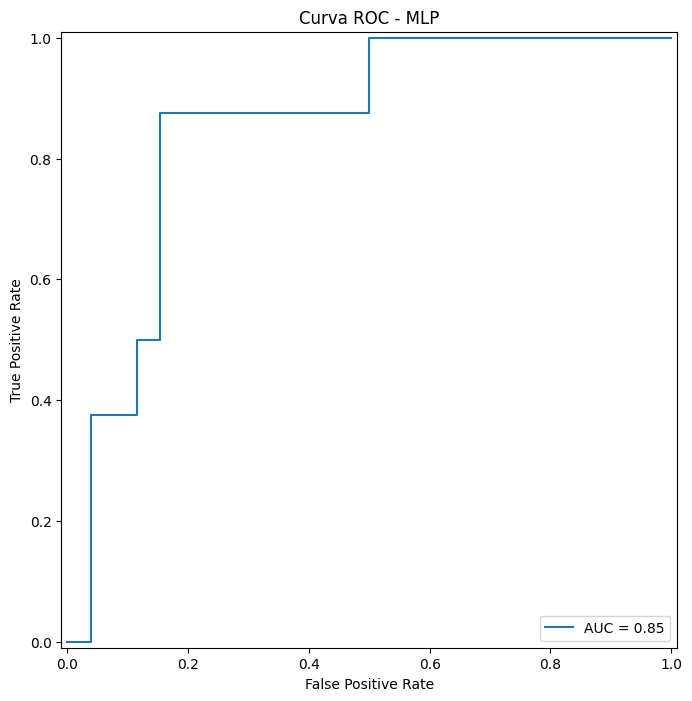

In [29]:
# Reentrenar y evaluar gráficamente
modelos = {'Logística':clf, 'MLP':clf_mlp}
for nombre, modelo in modelos.items():

    modelo.fit(X_train, y_train)
    print(f"\n📊 Evaluación visual: {nombre}")
    evaluar_modelo_con_graficos(modelo, X_test, y_test, nombre)

# Ejercicios


1. The dataset bdiag.csv, included several imaging details from patients that had a biopsy to test for breast cancer.
The variable Diagnosis classifies the biopsied tissue as M = malignant or B = benign.

- Liga [bdiag](https://www.dropbox.com/s/vp44yozebx5xgok/bdiag.csv?dl=1)
- Fit a logistic regression to predict Diagnosis using texture_mean and radius_mean.
- Build the confusion matrix for the model above
- Calculate the area and the ROC curve for the model in a).
- Plot the scatter plot for texture_mean and radius_mean and draw the border line for the prediction of Diagnosis based on the model in a)
- If you wanted to use the model above to predict the result of the biopsy, but wanted to decrease the chances of a false negative test, what strategy could you use?

2. The SBI.csv dataset contains the information of more than 2300 children that attended the emergency services with fever and were tested for serious bacterial infection. The outcome sbi has 4 categories: Not Applicable(no infection) / UTI / Pneum / Bact

- Liga [sbi](https://www.dropbox.com/s/da3by5vuzkv77xi/SBI.csv?dl=1) 
- Build a multinomial model using wcc, age, prevAB, pct, and crp to predict sbi
- Compute the confusion matrix and compute the kappa statistics
- How does the model classify a child with 1 year of age, WCC=29, PCT=5, CRP=200 and no prevAB?